In [1]:
#we use DROPOUT this is used for improving accuracy and avoiding the overfitting 

In [93]:
#libraries
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [95]:
#Load dataset
dataset = pd.read_csv('customer_churn_dataset_10000.csv')
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,36,9,75545.78,3,0,1,102407.92,0
1,659,54,5,146329.55,4,0,0,145672.18,0
2,437,39,2,36866.73,1,0,1,169330.69,0
3,805,49,7,59527.03,1,1,1,123704.11,0
4,735,58,2,42917.82,2,0,0,77518.87,1


In [97]:
#Check is there any null value
dataset.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [99]:
input_data= dataset.iloc[:, :-1]   # all features
output_data= dataset.iloc[:, -1]    # only last column (labels)


In [101]:
#Scalling of data
ss = StandardScaler()
input_data = pd.DataFrame(ss.fit_transform(input_data), columns = input_data.columns)
input_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.056608,-0.377436,1.462972,-0.472352,0.473206,-0.924632,1.062980,-0.132003
1,0.337459,0.968975,0.171535,0.740119,1.335147,-0.924632,-0.940752,0.685194
2,-1.221261,-0.153035,-0.797043,-1.134894,-1.250677,-0.924632,1.062980,1.132069
3,1.362563,0.594972,0.817254,-0.746741,-1.250677,1.081512,1.062980,0.270250
4,0.871075,1.268177,-0.797043,-1.031244,-0.388735,-0.924632,-0.940752,-0.602121
...,...,...,...,...,...,...,...,...
9995,-1.481048,-1.275044,-1.442761,-1.713962,1.335147,1.081512,1.062980,0.712227
9996,-1.396793,1.118576,0.171535,-0.407526,-0.388735,1.081512,1.062980,-1.208781
9997,-1.467006,-0.826240,-0.474183,-0.827844,-0.388735,-0.924632,1.062980,0.195041
9998,-1.495091,-1.499446,-0.797043,1.589259,-1.250677,-0.924632,1.062980,-0.179345


In [103]:
input_data.shape

(10000, 8)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    input_data,
    output_data,
    test_size=0.2,
    random_state=10
)


In [107]:
X_train.shape

(8000, 8)

In [109]:
X_test.shape

(2000, 8)

In [111]:
import tensorflow
from keras.regularizers import L2
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [71]:
ann = Sequential()

ann.add(Dense(6, input_dim=8, activation="relu", kernel_regularizer=L2(l2=0.01)))

ann.add(Dense(4, activation="relu",kernel_regularizer=L2(l2=0.01)))

ann.add(Dense(2, activation="relu",kernel_regularizer=L2(l2=0.01)))
ann.add(Dropout(0.3))
ann.add(Dense(1, activation="sigmoid"))

C:\Users\Muzamil Hussain\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [75]:
ann.fit(X_train, y_train, batch_size=100, epochs=50, validation_data = (X_test, y_test), callbacks = EarlyStopping())

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5253 - loss: 0.8928 - val_accuracy: 0.5320 - val_loss: 0.8139
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5426 - loss: 0.8120 - val_accuracy: 0.5870 - val_loss: 0.7879
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5669 - loss: 0.7862 - val_accuracy: 0.6110 - val_loss: 0.7706
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5826 - loss: 0.7701 - val_accuracy: 0.6225 - val_loss: 0.7582
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5850 - loss: 0.7601 - val_accuracy: 0.6140 - val_loss: 0.7483
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5913 - loss: 0.7483 - val_accuracy: 0.6205 - val_loss: 0.7403
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6087 - loss: 0.7388 - val_accuracy: 0.6245 - val_loss: 0.7330
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6019 - loss: 0.7332 - val_accuracy: 0.6315 - val_loss:

In [77]:
train_accuracy = ann.history.history["accuracy"]
test_accuracy = ann.history.history["val_accuracy"]

In [79]:
len(test_accuracy)

40

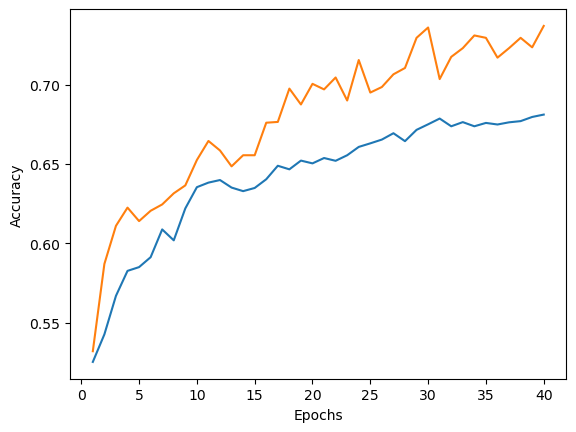

In [81]:
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy)
plt.plot(epochs, test_accuracy)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


In [83]:
prd = ann.predict(X_test)
prd_data = []
for i in prd:
    if i[0] > 0.5:
        prd_data.append(1)
    else: 
        prd_data.append(0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [85]:
prd1 = ann.predict(X_train)
prd_data1 = []
for i in prd1:
    if i[0] > 0.5:
        prd_data1.append(1)
    else: 
        prd_data1.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [87]:
from sklearn.metrics import accuracy_score

In [89]:
accuracy_score(y_test, prd_data)*100

73.7

In [91]:
accuracy_score(y_train, prd_data1)*100

74.3